# Myeloid cell subset UMAP and dotplot
Figure 2C and Extended Figure 2B

- Author: CW
- files needed: 1_RNA_all.rds (if starting from beginning of workflow), 4_RNA_myeloid_cells.rds
- Last updated: 04/09/24

In [1]:
library(Seurat)
library(ggplot2)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.0      SeuratObject_5.0.1 Seurat_4.3.0.1    

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-4          
  [4] ggridges_0.5.6         IRdisplay_1.1          base64enc_0.1-3       
  [7] spatstat.data_3.0-4

# 1. subset myeloid cells from big object and scale

In [1]:
obj.RNA <- readRDS("/path_to_file/1_RNA_all.rds")

In [2]:
obj.RNA

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Loading required package: Seurat



An object of class Seurat 
56004 features across 215946 samples within 2 assays 
Active assay: SCT (27709 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [7]:
myeloid_cells <- subset(obj.RNA, subset = cell_type %in% c('Monocyte/Macrophage', 'cDC', 'Mast', 'pDC'))

In [ ]:
#QC metrics
options(repr.plot.width=14, repr.plot.height=3)

VlnPlot(obj, group.by = cell_type, features = c('nFeature_RNA','nCount_RNA','percent_ribo','percent_mt','G2M.Score'),
         ncol = 5, pt.size = 0)

In [8]:
#SCTransform subset 
#DefaultAssay(myeloid_cells) <- 'RNA'
myeloid_cells <- SCTransform(myeloid_cells)

#PCA 
myeloid_cells <- RunPCA(myeloid_cells, verbose = FALSE,  assay = "SCT")

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19750 by 16308

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 81 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19750 genes



  |======================================================================| 100%


Computing corrected count matrix for 19750 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.364253 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



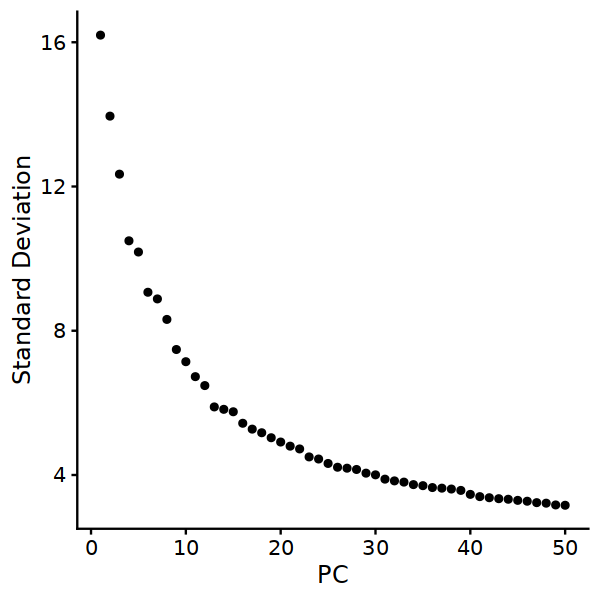

In [10]:
options(repr.plot.height = 3, repr.plot.width =3)
ElbowPlot(myeloid_cells, ndims = 50)

Loading required package: Rcpp

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”


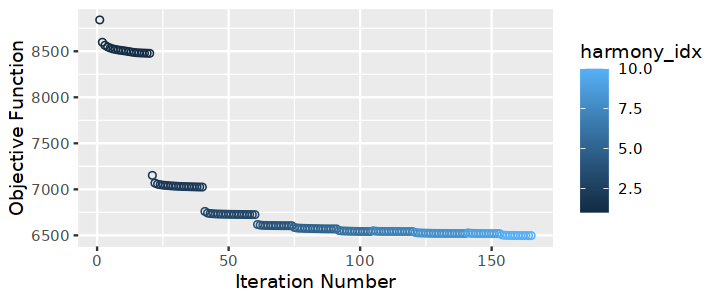

In [9]:
#harmony
library(harmony)

options(repr.plot.height = 2.5, repr.plot.width = 6)
myeloid_cells <- myeloid_cells %>% 
    RunHarmony(c("patient_sample"),
               assay.use = "SCT", plot_convergence = TRUE)

In [90]:
myeloid_cells <- RunUMAP(myeloid_cells, dims = 1:30, reduction = "harmony", verbose = FALSE)

In [11]:
options(repr.plot.height = 10, repr.plot.width = 30)

p1 <- DimPlot(myeloid_cells_20_dims, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)

p2 <- DimPlot(myeloid_cells_20_dims, reduction = "umap", group.by = "cell_type",   
              label.size = 3, repel = TRUE)

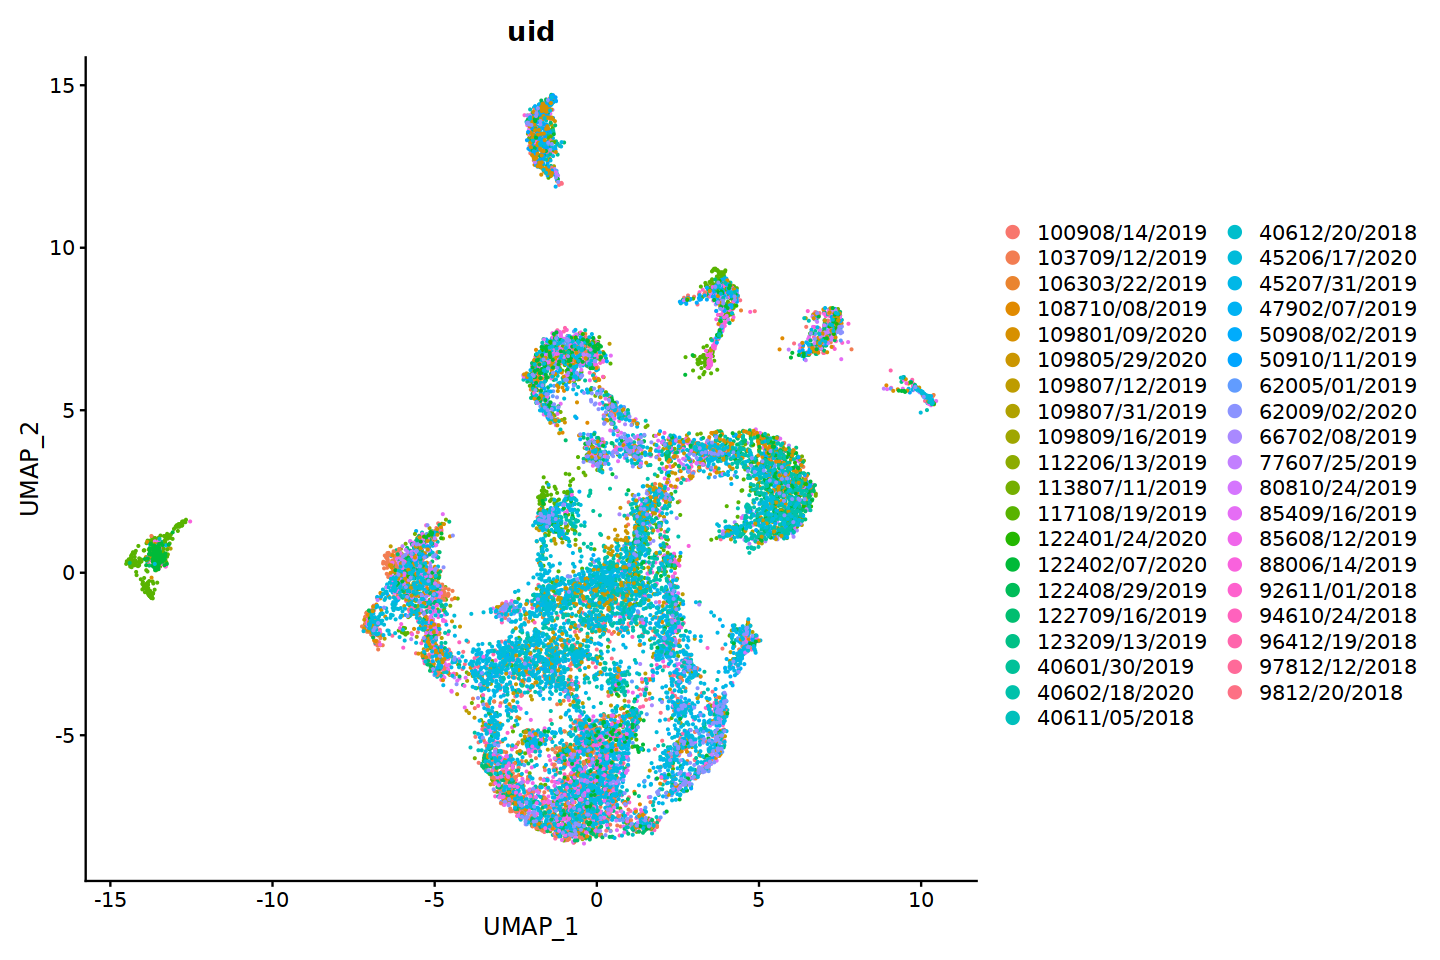

In [12]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1

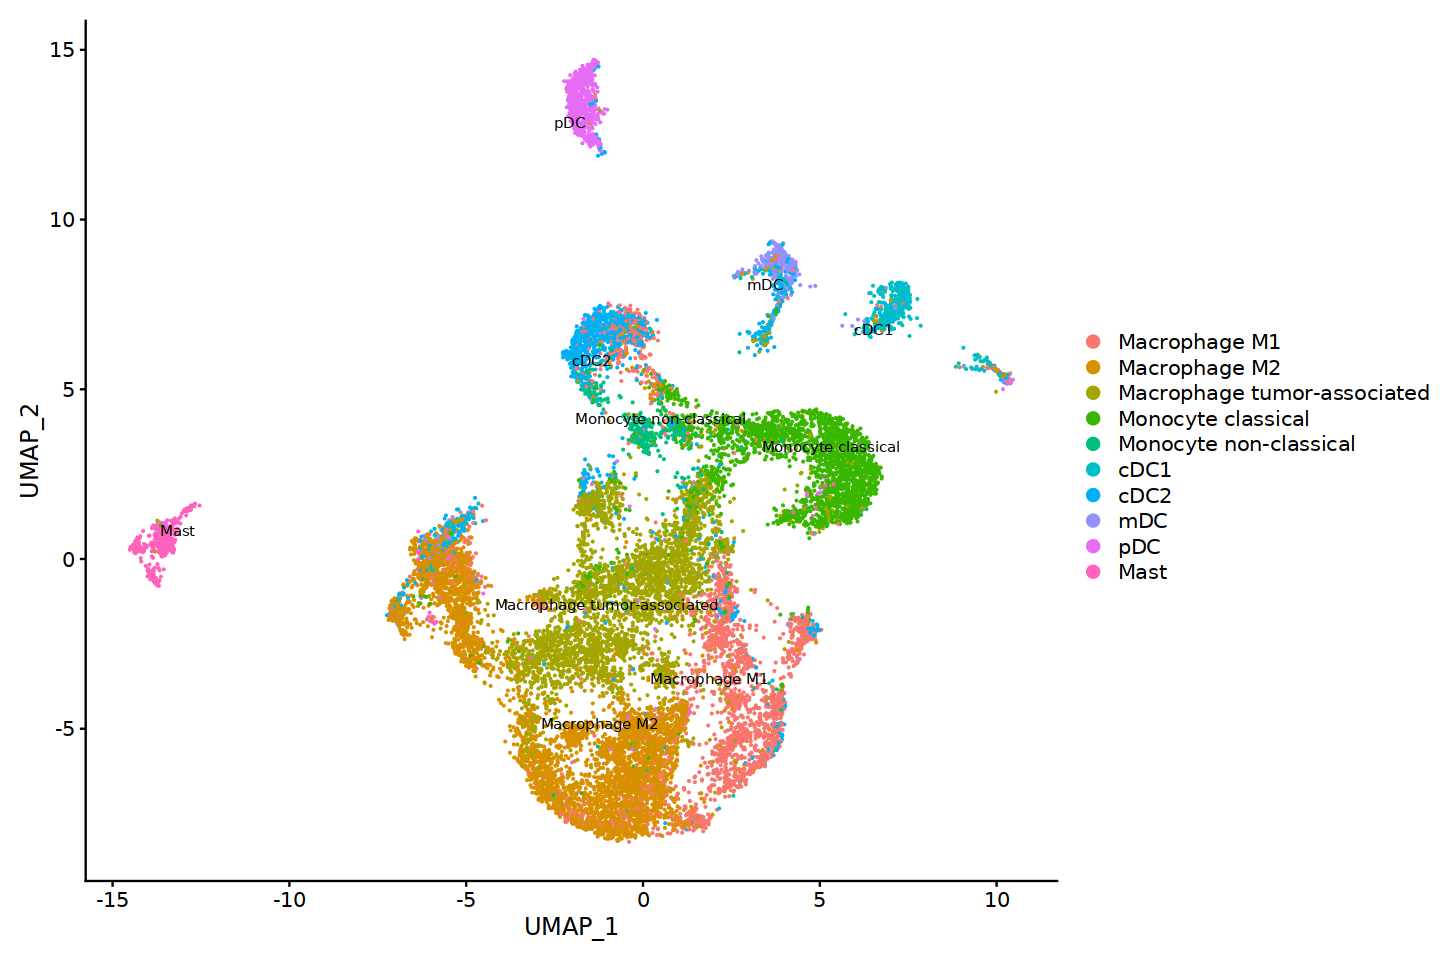

In [92]:
options(repr.plot.height = 8, repr.plot.width = 12)

DimPlot(myeloid_cells, reduction = "umap",   
              label.size = 3, repel = TRUE, label= TRUE)

# Calculate Myeloid cell percentages

In [25]:
#cDC 
total_n_cDC <- dim(myeloid_cells@meta.data[myeloid_cells$cell_type == 'cDC',])[1]

cDC_subtypes <- unique(myeloid_cells@meta.data[myeloid_cells$cell_type == 'cDC',]$cell_subtype)

all_percentages_cDC <- c()
for(ct in cDC_subtypes) {
    percentage = (dim(myeloid_cells@meta.data[myeloid_cells$cell_subtype == ct,])[1]/total_n_cDC)*100
    all_percentages_cDC <- append(all_percentages_cDC, percentage)                             
}

cDC_subtypes
all_percentages_cDC <- unlist(lapply(all_percentages_cDC, function(x) round(x, 2)))
all_percentages_cDC

[1] "cDC1" "cDC2" "mDC"

[1] 24.40 59.54 16.06

In [26]:
#Monocyte/macrophage 
total_n_monomacro <- dim(myeloid_cells@meta.data[myeloid_cells$cell_type == 'Monocyte/Macrophage',])[1]


monomacro_subtypes <- unique(myeloid_cells@meta.data[myeloid_cells$cell_type == 'Monocyte/Macrophage',]$cell_subtype)

all_percentages_monomacro <- c()
for(ct in monomacro_subtypes) {
    percentage = (dim(myeloid_cells@meta.data[myeloid_cells$subtyped_cell_type == ct,])[1]/total_n_monomacro)*100
    all_percentages_monomacro <- append(all_percentages_monomacro, percentage)                             
}

monomacro_subtypes
all_percentages_monomacro <- unlist(lapply(all_percentages_monomacro, function(x) round(x, 2)))
all_percentages_monomacro

[1] "Macrophage M2"               "Macrophage M1"              
[3] "Monocyte non-classical"      "Monocyte classical"         
[5] "Macrophage tumor-associated"

[1] 34.52 17.86  3.54 17.47 26.61

In [27]:
#Mast 
all_percentages_mast <- 1.00 

In [28]:
#pDC 
all_percentages_pDC <- 1.00 

In [ ]:
#save myeloid subset
saveRDS(myeloid_cells, '/path_to_file/4_myeloid_cells.rds')

# Final plot

In [9]:
myeloid_cells <- readRDS( '/path_to_file/4_RNA_myeloid_cells.rds'))

In [10]:
#reorder subtypes as the idents 
Idents(myeloid_cells) <- 'subtyped_cell_type'

Idents(myeloid_cells) <- factor(myeloid_cells$cell_subtype,levels=c("Macrophage M1","Macrophage M2", "Macrophage tumor-associated", 
                                                                         "Monocyte classical", "Monocyte non-classical", "cDC1","cDC2","mDC",
                                                                           "pDC", "Mast"))

In [66]:
Myeloid_props <- data.frame(row.names = unique(myeloid_cells@meta.data$cell_subtype))

Myeloid_props$count <- 0
Myeloid_props$percentage <- 0
for(ct in rownames(Myeloid_props))
{
  Myeloid_props[ct,]$count <- length(rownames(myeloid_cells@meta.data[myeloid_cells@meta.data$cell_subtype == ct,]))
}
for(ct in rownames(Myeloid_props))
{
  Myeloid_props[ct,]$percentage <- round(x = 100 * Myeloid_props[ct,]$count/length(rownames(myeloid_cells@meta.data[myeloid_cells@meta.data$cell_type == unique(myeloid_cells@meta.data[myeloid_cells@meta.data$cell_subtype == ct,]$cell_type),])), 2)
}


In [67]:
Myeloid_props <- Myeloid_props %>% arrange(factor(rownames(Myeloid_props), levels=c("Macrophage M1","Macrophage M2", "Macrophage tumor-associated", 
                                                                         "Monocyte classical", "Monocyte non-classical", "cDC1","cDC2","mregDC",
                                                                           "pDC", "Mast")))

In [68]:
myeloid_cells$subtyped_cell_type_percent <- 'none'

for (ident in rownames(Myeloid_props))
{
  myeloid_cells@meta.data[myeloid_cells@meta.data$subtyped_cell_type == ident,]$subtyped_cell_type_percent <- paste0(ident, " (", Myeloid_props[ident,]$percentage, "%)")
}

In [18]:
unique(myeloid_cells$subtyped_cell_type_percent)

[1] Macrophage M2 (34.52%)               cDC1 (24.4%)                        
 [3] Macrophage M1 (17.86%)               cDC2 (59.54%)                       
 [5] Monocyte non-classical (3.54%)       pDC (100%)                          
 [7] Monocyte classical (17.47%)          Macrophage tumor-associated (26.61%)
 [9] mDC (16.06%)                         Mast (100%)                         
10 Levels: Monocyte classical (17.47%) ... Mast (100%)

## 1. Myeloid cell UMAP - Figure 2C

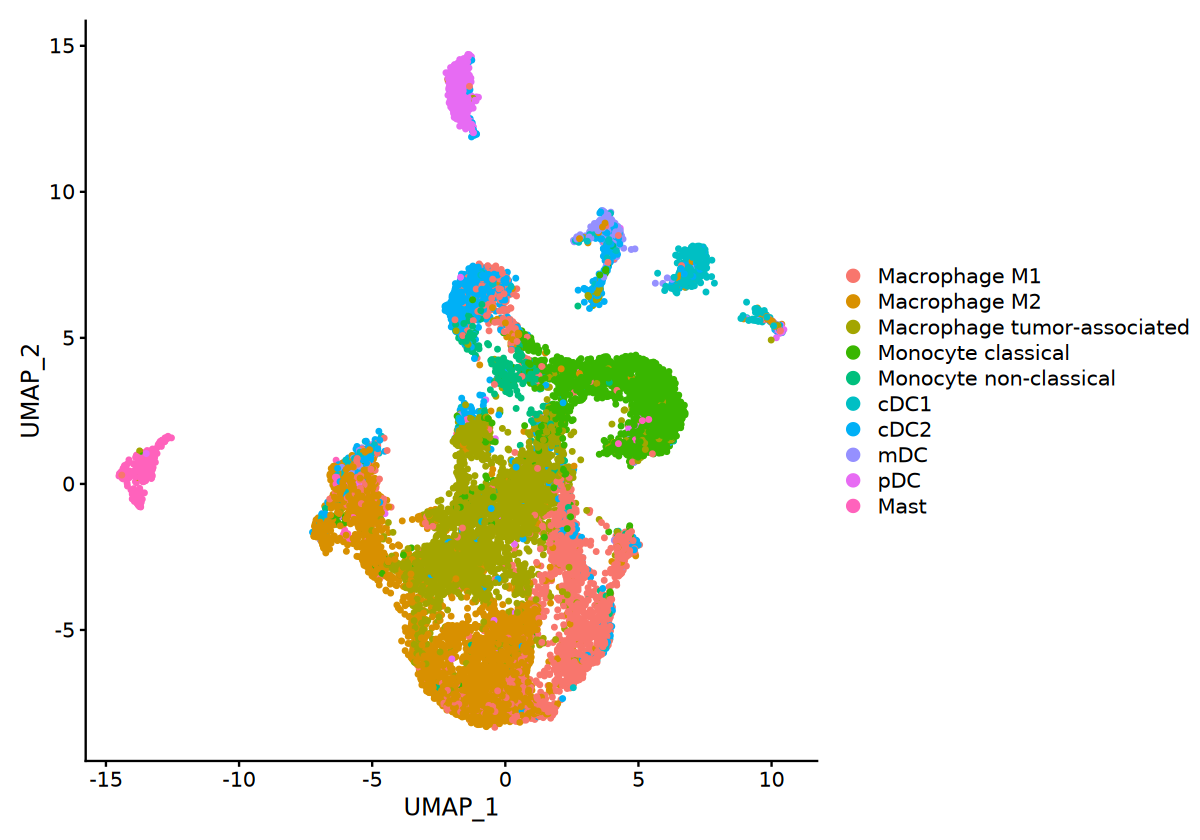

In [11]:
## FIGURE 2C
options(repr.plot.width = 10, repr.plot.height = 7)
DimPlot(myeloid_cells, pt.size = 0.9)

In [94]:
#save myeloid subset
saveRDS(myeloid_cells, '/path_to_file/4_myeloid_cells.rds')

## 2. Myeloid cell dotplot - Extended Figure 2B

In [14]:
markers <- c('BCL2A1', 'FCGR3A', 'CXCL10', 'FCGR1A', 'MS4A6A', 'CD68', 'CD14', 'CD163', 'MRC1', 'TREM2', 'ITGAM',
             'CCL20', 'IL1B', 'XCR1', 'CLEC9A', 'BATF3', 'C1orf54', 'HLA-DRA', 'FCER1A', 'CD1A', 'CD1C', 'MARCKSL1',
             'BIRC3', 'CCR7', 'RELB', 'TLR7', 'TCF4', 'IL3RA', 'LILRB4', 'CD4', 'TPSAB1', 'CPA3', 'HPGD', 'TPSB2')

In [15]:
DefaultAssay(myeloid_cells) <- 'SCT'

In [16]:
options(repr.plot.width = 15, repr.plot.height = 8)
dotplot <- DotPlot(myeloid_cells, features = markers, cols = 'RdBu') + theme(axis.text.x = element_text(angle = 90))

dotplot$data$id <- factor(dotplot$data$id, levels = rev(c("Monocyte classical", "Monocyte non-classical", "Macrophage M1", 
                                                         "Macrophage M2", "Macrophage tumor-associated", "cDC1", "cDC2", "mregDC", "pDC", "Mast")))

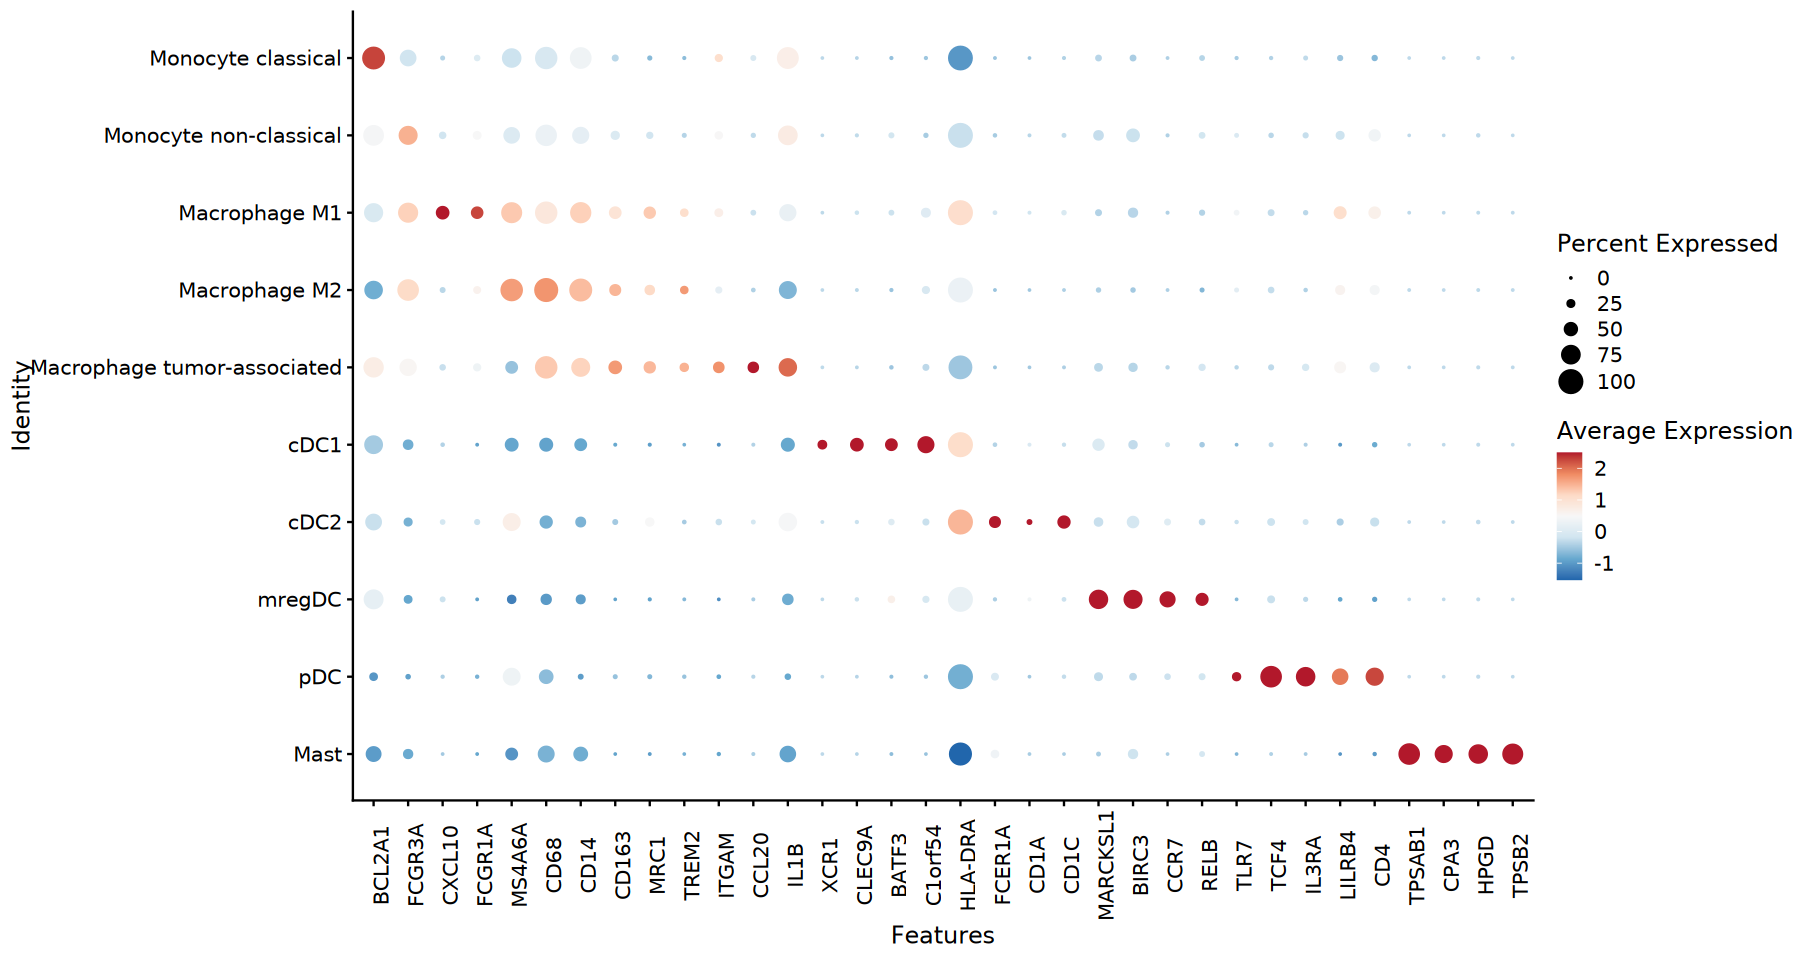

In [17]:
dotplot